# What is Imputation?

<!--<badge>--><a href="https://colab.research.google.com/github/computiq-training/Machine_Learning_for_Climate_Change/blob/main/Week 05_ Advanced Machine Learning/02 Imputation of Missing Values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><!--</badge>-->

Imputation is a technique used for replacing the missing data with some substitute value to retain most of the data/information of the dataset. These techniques are used because removing the data from the dataset every time is not feasible and can lead to a reduction in the size of the dataset to a large extend, which not only raises concerns for biasing the dataset but also leads to incorrect analysis.

# Why Imputation is Important?

We use imputation because Missing data can cause the below issues: –

1. **Incompatible with most of the Python libraries used in Machine Learning:-** Yes, you read it right. While using the libraries for ML(the most common is skLearn), they don’t have a provision to automatically handle these missing data and can lead to errors.
2. **Distortion in Dataset:-** A huge amount of missing data can cause distortions in the variable distribution i.e it can increase or decrease the value of a particular category in the dataset.
3. **Affects the Final Model:-** the missing data can cause a bias in the dataset and can lead to a faulty analysis by the model.



Another and the most important reason is “We want to restore the complete dataset”. This is mostly in the case when we do not want to lose any(more of) data from our dataset as all of it is important, & secondly, dataset size is not very big, and removing some part of it can have a significant impact on the final model.

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d jsphyg/weather-dataset-rattle-package

  0% 0.00/3.83M [00:00<?, ?B/s]
100% 3.83M/3.83M [00:00<00:00, 224MB/s]


In [ ]:
!unzip  /content/weather-dataset-rattle-package.zip

Archive:  /content/weather-dataset-rattle-package.zip
  inflating: weatherAUS.csv          


In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import datasets, model_selection, svm, metrics, pipeline, preprocessing,impute
from tqdm import tqdm 
from sklearn.experimental import enable_iterative_imputer

In [ ]:
# Define a function to split our dataset into train/test splits using indices
def train_test_split(x, y, train_indices, test_indices):
    return x[train_indices], x[test_indices], y[train_indices], y[test_indices]

#### Load the Dataset

In [ ]:
# Read the data using pandas 
data=pd.read_csv('/content/weatherAUS.csv')
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


## Balance the Dataset


No     110316
Yes     31877
Name: RainTomorrow, dtype: int64


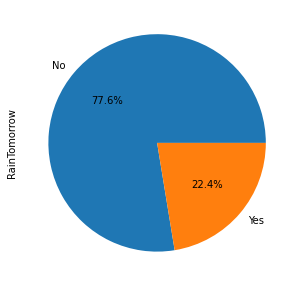

In [ ]:
print(data.RainTomorrow.value_counts())
data.RainTomorrow.value_counts().plot.pie(figsize = (5,5),
                                        autopct = '%1.1f%%')


In [ ]:
# create new dataset the balance 
new_dataset=data[data.RainTomorrow=='Yes']
new_dataset=new_dataset.append(data[data.RainTomorrow=='No'].sample(n=32000,random_state=42))

# Reset indexes
new_dataset.reset_index(inplace=True,drop=True)

No     32000
Yes    31877
Name: RainTomorrow, dtype: int64


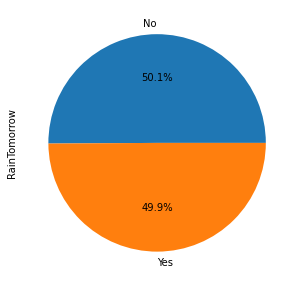

In [ ]:
print(new_dataset.RainTomorrow.value_counts())
new_dataset.RainTomorrow.value_counts().plot.pie(figsize = (5,5),
                                        autopct = '%1.1f%%')


#### Preprocessing the Dataset

In [ ]:
# Get the number of missing values
new_dataset.isna().sum()

Date                 0
Location             0
MinTemp            315
MaxTemp            135
Rainfall           887
Evaporation      27700
Sunshine         30515
WindGustDir       4479
WindGustSpeed     4446
WindDir9am        4341
WindDir3pm        1880
WindSpeed9am       651
WindSpeed3pm      1254
Humidity9am        894
Humidity3pm       1735
Pressure9am       6300
Pressure3pm       6309
Cloud9am         23562
Cloud3pm         24781
Temp9am            482
Temp3pm           1317
RainToday          887
RainTomorrow         0
dtype: int64

In [ ]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63877 entries, 0 to 63876
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        63562 non-null  float64
 1   MaxTemp        63742 non-null  float64
 2   Rainfall       62990 non-null  float64
 3   Evaporation    36177 non-null  float64
 4   Sunshine       33362 non-null  float64
 5   WindGustDir    59398 non-null  object 
 6   WindGustSpeed  59431 non-null  float64
 7   WindDir9am     59536 non-null  object 
 8   WindDir3pm     61997 non-null  object 
 9   WindSpeed9am   63226 non-null  float64
 10  WindSpeed3pm   62623 non-null  float64
 11  Humidity9am    62983 non-null  float64
 12  Humidity3pm    62142 non-null  float64
 13  Pressure9am    57577 non-null  float64
 14  Pressure3pm    57568 non-null  float64
 15  Cloud9am       40315 non-null  float64
 16  Cloud3pm       39096 non-null  float64
 17  Temp9am        63395 non-null  float64
 18  Temp3p

In [ ]:
# Drop the following columns 
# ['Location','Date']
new_dataset.drop(columns=['Location','Date'],inplace =True)

In [ ]:
new_dataset.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,63562.000000,63742.000000,62990.000000,36177.000000,33362.00000,59431.000000,63226.000000,62623.000000,62983.000000,62142.000000,57577.000000,57568.000000,40315.000000,39096.000000,63395.000000,62560.000000
mean,12.526083,22.455227,3.697038,5.157727,6.48602,42.065387,14.526128,19.135653,72.110649,57.655547,1016.518863,1014.236524,5.048964,5.198639,16.855399,20.782842
std,6.393601,7.117981,11.073131,4.093851,3.94075,14.678371,9.187095,9.197473,18.622993,21.808682,7.351460,7.285216,2.777226,2.623043,6.456852,6.943578
min,-8.500000,-4.100000,0.000000,0.000000,0.00000,6.000000,0.000000,0.000000,2.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-5.900000,-5.100000
25%,7.900000,17.200000,0.000000,2.400000,3.10000,31.000000,7.000000,13.000000,60.000000,43.000000,1011.700000,1009.300000,2.000000,3.000000,12.100000,15.700000
50%,12.200000,21.700000,0.000000,4.400000,6.80000,41.000000,13.000000,19.000000,74.000000,58.000000,1016.500000,1014.200000,6.000000,6.000000,16.500000,20.100000
75%,17.200000,27.400000,2.200000,7.000000,9.80000,50.000000,20.000000,24.000000,87.000000,73.000000,1021.500000,1019.200000,7.000000,7.000000,21.400000,25.500000
max,31.200000,47.300000,371.000000,145.000000,14.30000,135.000000,87.000000,87.000000,100.000000,100.000000,1040.600000,1038.400000,9.000000,9.000000,40.200000,46.100000


No     32000
Yes    31877
Name: RainTomorrow, dtype: int64


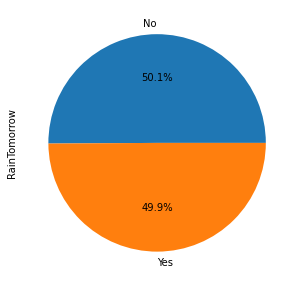

In [ ]:
print(new_dataset.RainTomorrow.value_counts())
new_dataset.RainTomorrow.value_counts().plot.pie(figsize = (5,5),
                                        autopct = '%1.1f%%')


In [ ]:
# Create tokenizer function to convert the labels to numerical values
def tokenizer(col):
    word_id={}
    id_word = {}
    for id,word in enumerate(col.unique()):
        if pd.notna(word):
            word_id[word]=id 
            id_word[id] = word
    return word_id,id_word


In [ ]:
# Get the label to id and id to label dictdictionary 
RainTomorrow_id,id_RainTomorrow = tokenizer(new_dataset.RainTomorrow)
# Convert the labels to ids using the label_id dictionary 
new_dataset.RainTomorrow.replace(RainTomorrow_id,inplace=True)




# Get the word to id and id to word dictdictionary 
RainToday_id,id_RainToday = tokenizer(new_dataset.RainToday)
# Convert the word to ids using the label id dictionary 
new_dataset.RainToday.replace(RainToday_id,inplace=True)



# Get the word to id and id to word dictdictionary 
WindDir3pm_id,id_WindDir3pm = tokenizer(new_dataset.WindDir3pm)
# Convert the word to ids using the label id dictionary 
new_dataset.WindDir3pm.replace(WindDir3pm_id,inplace=True)


# Get the word to id and id to word dictdictionary 
WindDir9am_id,id_WindDir9am = tokenizer(new_dataset.WindDir9am)
# Convert the word to ids using the label id dictionary 
new_dataset.WindDir9am.replace(WindDir9am_id,inplace=True)


# Get the word to id and id to word dictdictionary 
WindGustDir_id,id_WindGustDir = tokenizer(new_dataset.WindGustDir)
# Convert the word to ids using the label id dictionary 
new_dataset.WindGustDir.replace(WindGustDir_id,inplace=True)


In [ ]:
new_dataset

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,9.7,31.9,0.0,NaN,NaN,0.0,80.0,0.0,0.0,7.0,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,0.0,0
1,13.4,30.4,0.0,NaN,NaN,1.0,30.0,1.0,1.0,17.0,...,48.0,22.0,1011.8,1008.7,NaN,NaN,20.4,28.8,0.0,0
2,15.9,21.7,2.2,NaN,NaN,2.0,31.0,2.0,2.0,15.0,...,89.0,91.0,1010.5,1004.2,8.0,8.0,15.9,17.0,1.0,0
3,15.9,18.6,15.6,NaN,NaN,3.0,61.0,3.0,3.0,28.0,...,76.0,93.0,994.3,993.0,8.0,8.0,17.4,15.8,1.0,0
4,14.1,20.9,0.0,NaN,NaN,4.0,22.0,4.0,4.0,11.0,...,69.0,82.0,1012.2,1010.4,8.0,1.0,17.2,18.1,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63872,20.6,37.7,0.0,11.2,12.7,11.0,30.0,1.0,10.0,19.0,...,50.0,19.0,1018.8,1016.6,0.0,NaN,23.9,36.1,0.0,1
63873,9.2,25.4,0.0,6.8,10.6,11.0,30.0,NaN,12.0,0.0,...,60.0,31.0,1017.2,1014.2,7.0,7.0,17.9,24.1,0.0,1
63874,11.4,21.6,0.0,6.2,10.3,14.0,69.0,3.0,16.0,13.0,...,34.0,30.0,1007.9,1006.2,2.0,6.0,18.6,18.9,0.0,1
63875,25.7,34.6,0.0,4.0,9.3,12.0,67.0,11.0,5.0,13.0,...,59.0,58.0,1010.5,1005.4,4.0,2.0,30.4,33.8,0.0,1


# Univariate vs. Multivariate Imputation


**Univariate** imputation implies that we are only considering the values of a single column when performing imputation. 

**Multivariate imputation**, on the other hand, involves taking into account other features in the dataset when performing imputation.




The multivariate approach to imputing is generally preferred over the univariate approach as it is more robust and provides our model with a more accurate representation of the missing values in order to make better predictions.

## Univariate Feature Imputation

Univariate feature imputation. The `SimpleImputer` class provides basic strategies for imputing missing values.
Missing values can be imputed with a provided constant value, or using the statistics (mean, median or most frequent) of each column in which the missing values are located.

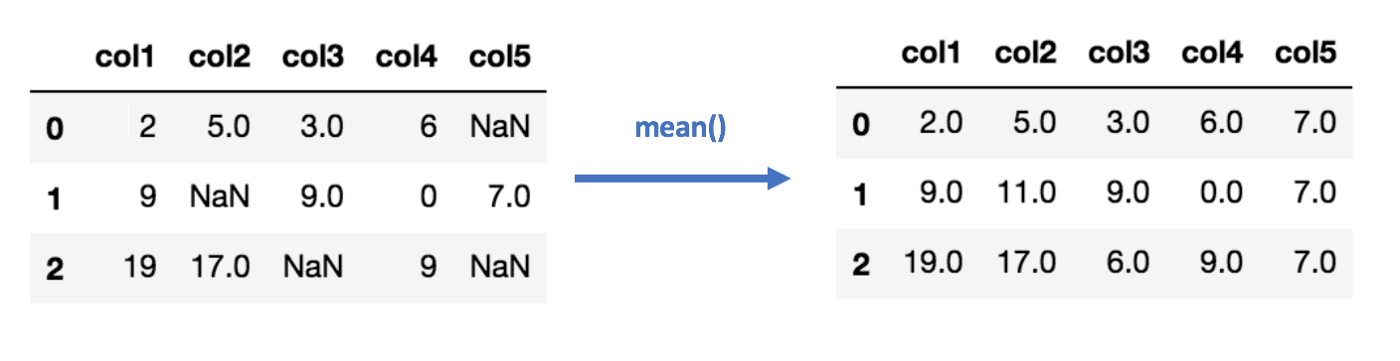

### Imputation of Missing Values Using SimpleImputer

In [ ]:
# initialize the simple imputer  
imp = impute.SimpleImputer(missing_values=np.nan, strategy='mean')
# Fit impute on the dataset 
imp.fit(new_dataset)
# Imputation of missing values
new_dataset_imp = imp.transform(new_dataset)

In [ ]:
# Create DataFrame from new_dataset_imp
new_dataset_imp = pd.DataFrame(new_dataset_imp,columns=new_dataset.columns)
new_dataset_imp

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,9.7,31.9,0.0,5.157727,6.48602,0.0,80.0,0.000000,0.0,7.0,...,42.0,9.0,1008.9,1003.6,5.048964,5.198639,18.3,30.2,0.0,0.0
1,13.4,30.4,0.0,5.157727,6.48602,1.0,30.0,1.000000,1.0,17.0,...,48.0,22.0,1011.8,1008.7,5.048964,5.198639,20.4,28.8,0.0,0.0
2,15.9,21.7,2.2,5.157727,6.48602,2.0,31.0,2.000000,2.0,15.0,...,89.0,91.0,1010.5,1004.2,8.000000,8.000000,15.9,17.0,1.0,0.0
3,15.9,18.6,15.6,5.157727,6.48602,3.0,61.0,3.000000,3.0,28.0,...,76.0,93.0,994.3,993.0,8.000000,8.000000,17.4,15.8,1.0,0.0
4,14.1,20.9,0.0,5.157727,6.48602,4.0,22.0,4.000000,4.0,11.0,...,69.0,82.0,1012.2,1010.4,8.000000,1.000000,17.2,18.1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63872,20.6,37.7,0.0,11.200000,12.70000,11.0,30.0,1.000000,10.0,19.0,...,50.0,19.0,1018.8,1016.6,0.000000,5.198639,23.9,36.1,0.0,1.0
63873,9.2,25.4,0.0,6.800000,10.60000,11.0,30.0,7.850175,12.0,0.0,...,60.0,31.0,1017.2,1014.2,7.000000,7.000000,17.9,24.1,0.0,1.0
63874,11.4,21.6,0.0,6.200000,10.30000,14.0,69.0,3.000000,16.0,13.0,...,34.0,30.0,1007.9,1006.2,2.000000,6.000000,18.6,18.9,0.0,1.0
63875,25.7,34.6,0.0,4.000000,9.30000,12.0,67.0,11.000000,5.0,13.0,...,59.0,58.0,1010.5,1005.4,4.000000,2.000000,30.4,33.8,0.0,1.0


In [ ]:
# Get the number of missing values
new_dataset_imp.isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [ ]:
new_dataset_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63877 entries, 0 to 63876
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        63877 non-null  float64
 1   MaxTemp        63877 non-null  float64
 2   Rainfall       63877 non-null  float64
 3   Evaporation    63877 non-null  float64
 4   Sunshine       63877 non-null  float64
 5   WindGustDir    63877 non-null  float64
 6   WindGustSpeed  63877 non-null  float64
 7   WindDir9am     63877 non-null  float64
 8   WindDir3pm     63877 non-null  float64
 9   WindSpeed9am   63877 non-null  float64
 10  WindSpeed3pm   63877 non-null  float64
 11  Humidity9am    63877 non-null  float64
 12  Humidity3pm    63877 non-null  float64
 13  Pressure9am    63877 non-null  float64
 14  Pressure3pm    63877 non-null  float64
 15  Cloud9am       63877 non-null  float64
 16  Cloud3pm       63877 non-null  float64
 17  Temp9am        63877 non-null  float64
 18  Temp3p

### Split the Data to Features and Targets

In [ ]:
x = new_dataset_imp.drop(columns=['RainTomorrow'])
y = new_dataset_imp.RainTomorrow

In [ ]:
# Normalize the features 
normalizer = preprocessing.StandardScaler()
x_norm = normalizer.fit_transform(x)

In [ ]:
 # splits the data into 10 splits, using 9 for training and 1 for testing in each iteration with setting up the random state to 42
stratified_shuffled_k_fold = model_selection.StratifiedShuffleSplit(n_splits=10,random_state=42) 

# Empty arrays to store the scores
accuracy = []
precision = []
recall = []
f1_score = []

for train_indices, test_indices in stratified_shuffled_k_fold.split(x_norm, y): 
    # y is needed here for stratification, similar to stratify = y.
    # Split data using our predefined function
    x_train, x_test, y_train, y_test = train_test_split(
        x_norm, y, train_indices, test_indices
    )

    # Train model
    svc = svm.SVC()
    svc.fit(x_train, y_train)

    # Predict using test set
    y_pred = svc.predict(x_test)

    # Calculate scores
    accuracy.append( metrics.accuracy_score(y_test, y_pred))
    precision.append( metrics.precision_score(y_test, y_pred))
    recall.append( metrics.recall_score(y_test, y_pred))
    f1_score.append(metrics.f1_score(y_test, y_pred))

In [ ]:
# Conver scores array to dataframe
scores_df = pd.DataFrame({"accuracy": accuracy, 
                          "precision": precision, 
                          "recall": recall,
                          "F1":f1_score})
scores_df

,accuracy,precision,recall,F1
0,0.787101,0.783077,0.795312,0.789147
1,0.800877,0.795162,0.811562,0.803279
2,0.801503,0.796683,0.810625,0.803594
3,0.801659,0.797476,0.809688,0.803535
4,0.797120,0.792563,0.805937,0.799194
5,0.788823,0.785032,0.796562,0.790755
6,0.786788,0.782943,0.794687,0.788772
7,0.798372,0.792355,0.809688,0.800927
8,0.795241,0.792156,0.801562,0.796831
9,0.801346,0.801436,0.802188,0.801812


In [ ]:
# Calculate the mean of the scores
scores_df.mean()

accuracy     0.795883
precision    0.791888
recall       0.803781
F1           0.797785
dtype: float64

## Multivariate Feature Imputation
A more sophisticated approach is to use the IterativeImputer class, which models each feature with missing values as a function of other features, and uses that estimate for imputation. It does so in an iterated round-robin fashion: at each step, a feature column is designated as output y and the other feature columns are treated as inputs X. A regressor is fit on (X, y) for known y. Then, the regressor is used to predict the missing values of y. This is done for each feature in an iterative fashion, and then is repeated for `max_iter` imputation rounds. The results of the final imputation round are returned.

### Imputation of Missing Values Using IterativeImputer

In [ ]:
# initialize the Multivariate Feature Imputation
imp = impute.IterativeImputer(max_iter=100, random_state=42)
# Fit impute on the dataset 
imp.fit(new_dataset)
# Imputation of missing values
new_dataset_imp = imp.transform(new_dataset)

In [ ]:
# Create DataFrame from new_dataset_imp
new_dataset_imp = pd.DataFrame(new_dataset_imp,columns=new_dataset.columns)
new_dataset_imp

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,9.7,31.9,0.0,8.498890,10.415156,0.0,80.0,0.000000,0.0,7.0,...,42.0,9.0,1008.9,1003.6,2.178370,3.356041,18.3,30.2,0.0,0.0
1,13.4,30.4,0.0,7.689376,8.821463,1.0,30.0,1.000000,1.0,17.0,...,48.0,22.0,1011.8,1008.7,3.028357,4.027324,20.4,28.8,0.0,0.0
2,15.9,21.7,2.2,2.776506,1.092509,2.0,31.0,2.000000,2.0,15.0,...,89.0,91.0,1010.5,1004.2,8.000000,8.000000,15.9,17.0,1.0,0.0
3,15.9,18.6,15.6,4.408021,1.617529,3.0,61.0,3.000000,3.0,28.0,...,76.0,93.0,994.3,993.0,8.000000,8.000000,17.4,15.8,1.0,0.0
4,14.1,20.9,0.0,4.529563,5.727692,4.0,22.0,4.000000,4.0,11.0,...,69.0,82.0,1012.2,1010.4,8.000000,1.000000,17.2,18.1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63872,20.6,37.7,0.0,11.200000,12.700000,11.0,30.0,1.000000,10.0,19.0,...,50.0,19.0,1018.8,1016.6,0.000000,1.478670,23.9,36.1,0.0,1.0
63873,9.2,25.4,0.0,6.800000,10.600000,11.0,30.0,8.403464,12.0,0.0,...,60.0,31.0,1017.2,1014.2,7.000000,7.000000,17.9,24.1,0.0,1.0
63874,11.4,21.6,0.0,6.200000,10.300000,14.0,69.0,3.000000,16.0,13.0,...,34.0,30.0,1007.9,1006.2,2.000000,6.000000,18.6,18.9,0.0,1.0
63875,25.7,34.6,0.0,4.000000,9.300000,12.0,67.0,11.000000,5.0,13.0,...,59.0,58.0,1010.5,1005.4,4.000000,2.000000,30.4,33.8,0.0,1.0


In [ ]:
# Get the number of missing values
new_dataset_imp.isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [ ]:
new_dataset_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63877 entries, 0 to 63876
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        63877 non-null  float64
 1   MaxTemp        63877 non-null  float64
 2   Rainfall       63877 non-null  float64
 3   Evaporation    63877 non-null  float64
 4   Sunshine       63877 non-null  float64
 5   WindGustDir    63877 non-null  float64
 6   WindGustSpeed  63877 non-null  float64
 7   WindDir9am     63877 non-null  float64
 8   WindDir3pm     63877 non-null  float64
 9   WindSpeed9am   63877 non-null  float64
 10  WindSpeed3pm   63877 non-null  float64
 11  Humidity9am    63877 non-null  float64
 12  Humidity3pm    63877 non-null  float64
 13  Pressure9am    63877 non-null  float64
 14  Pressure3pm    63877 non-null  float64
 15  Cloud9am       63877 non-null  float64
 16  Cloud3pm       63877 non-null  float64
 17  Temp9am        63877 non-null  float64
 18  Temp3p

### Split the Data to Features and Targets

In [ ]:
x = new_dataset_imp.drop(columns=['RainTomorrow'])
y = new_dataset_imp.RainTomorrow

In [ ]:
# Normalize the features 
normalizer = preprocessing.StandardScaler()
x_norm = normalizer.fit_transform(x)

In [ ]:
 # splits the data into 10 splits, using 9 for training and 1 for testing in each iteration with setting up the random state to 42
stratified_shuffled_k_fold = model_selection.StratifiedShuffleSplit(n_splits=10,random_state=42) 

# Empty arrays to store the scores
accuracy = []
precision = []
recall = []
f1_score = []

for train_indices, test_indices in stratified_shuffled_k_fold.split(x_norm, y): 
    # y is needed here for stratification, similar to stratify = y.
    # Split data using our predefined function
    x_train, x_test, y_train, y_test = train_test_split(
        x_norm, y, train_indices, test_indices
    )

    # Train model
    svc = svm.SVC()
    svc.fit(x_train, y_train)

    # Predict using test set
    y_pred = svc.predict(x_test)

    # Calculate scores
    accuracy.append( metrics.accuracy_score(y_test, y_pred))
    precision.append( metrics.precision_score(y_test, y_pred))
    recall.append( metrics.recall_score(y_test, y_pred))
    f1_score.append(metrics.f1_score(y_test, y_pred))

In [ ]:
# Conver scores array to dataframe
scores_df = pd.DataFrame({"accuracy": accuracy, 
                          "precision": precision, 
                          "recall": recall,
                          "F1":f1_score})
scores_df

,accuracy,precision,recall,F1
0,0.817627,0.818666,0.816875,0.817769
1,0.822949,0.826856,0.817813,0.822310
2,0.830776,0.836242,0.823438,0.829791
3,0.826393,0.830959,0.820312,0.825602
4,0.820601,0.825000,0.814688,0.819811
5,0.820288,0.825301,0.813438,0.819326
6,0.816844,0.822837,0.808438,0.815574
7,0.823262,0.826142,0.819688,0.822902
8,0.824671,0.833761,0.811875,0.822673
9,0.826863,0.836008,0.814063,0.824889


In [ ]:
# Calculate the mean of the scores
scores_df.mean()

accuracy     0.823028
precision    0.828177
recall       0.816062
F1           0.822065
dtype: float64

# Nearest Neighbors Imputation

The `KNNImputer` class provides imputation for filling in missing values using the **k-Nearest Neighbors** approach. By default, a euclidean distance metric that supports missing values, `nan_euclidean_distances`, is used to find the nearest neighbors. 

Each missing feature is imputed using values from `n_neighbors` nearest neighbors that have a value for the feature. The feature of the neighbors are averaged uniformly or weighted by distance to each neighbor. If a sample has more than one feature missing, then the neighbors for that sample can be different depending on the particular feature being imputed. When the number of available neighbors is less than `n_neighbors` and there are no defined distances to the training set, the training set average for that feature is used during imputation. If there is at least one neighbor with a defined distance, the weighted or unweighted average of the remaining neighbors will be used during imputation. If a feature is always missing in training, it is removed during `transform`. 

In [ ]:
# initialize the KNNImputer
imp = impute.KNNImputer(n_neighbors=5, weights="uniform")
# Fit impute on the dataset 
imp.fit(new_dataset)
# Imputation of missing values
new_dataset_imp = imp.transform(new_dataset)

In [ ]:
# Create DataFrame from new_dataset_imp
new_dataset_imp = pd.DataFrame(new_dataset_imp,columns=new_dataset.columns)
new_dataset_imp

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,9.7,31.9,0.0,7.88,7.72,0.0,80.0,0.0,0.0,7.0,...,42.0,9.0,1008.9,1003.6,3.0,3.6,18.3,30.2,0.0,0.0
1,13.4,30.4,0.0,10.36,8.50,1.0,30.0,1.0,1.0,17.0,...,48.0,22.0,1011.8,1008.7,2.0,2.2,20.4,28.8,0.0,0.0
2,15.9,21.7,2.2,3.84,2.94,2.0,31.0,2.0,2.0,15.0,...,89.0,91.0,1010.5,1004.2,8.0,8.0,15.9,17.0,1.0,0.0
3,15.9,18.6,15.6,3.96,3.60,3.0,61.0,3.0,3.0,28.0,...,76.0,93.0,994.3,993.0,8.0,8.0,17.4,15.8,1.0,0.0
4,14.1,20.9,0.0,6.72,3.46,4.0,22.0,4.0,4.0,11.0,...,69.0,82.0,1012.2,1010.4,8.0,1.0,17.2,18.1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63872,20.6,37.7,0.0,11.20,12.70,11.0,30.0,1.0,10.0,19.0,...,50.0,19.0,1018.8,1016.6,0.0,2.0,23.9,36.1,0.0,1.0
63873,9.2,25.4,0.0,6.80,10.60,11.0,30.0,10.6,12.0,0.0,...,60.0,31.0,1017.2,1014.2,7.0,7.0,17.9,24.1,0.0,1.0
63874,11.4,21.6,0.0,6.20,10.30,14.0,69.0,3.0,16.0,13.0,...,34.0,30.0,1007.9,1006.2,2.0,6.0,18.6,18.9,0.0,1.0
63875,25.7,34.6,0.0,4.00,9.30,12.0,67.0,11.0,5.0,13.0,...,59.0,58.0,1010.5,1005.4,4.0,2.0,30.4,33.8,0.0,1.0


In [ ]:
# Get the number of missing values
new_dataset_imp.isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [ ]:
new_dataset_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63877 entries, 0 to 63876
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        63877 non-null  float64
 1   MaxTemp        63877 non-null  float64
 2   Rainfall       63877 non-null  float64
 3   Evaporation    63877 non-null  float64
 4   Sunshine       63877 non-null  float64
 5   WindGustDir    63877 non-null  float64
 6   WindGustSpeed  63877 non-null  float64
 7   WindDir9am     63877 non-null  float64
 8   WindDir3pm     63877 non-null  float64
 9   WindSpeed9am   63877 non-null  float64
 10  WindSpeed3pm   63877 non-null  float64
 11  Humidity9am    63877 non-null  float64
 12  Humidity3pm    63877 non-null  float64
 13  Pressure9am    63877 non-null  float64
 14  Pressure3pm    63877 non-null  float64
 15  Cloud9am       63877 non-null  float64
 16  Cloud3pm       63877 non-null  float64
 17  Temp9am        63877 non-null  float64
 18  Temp3p

### Split the Data to Features and Targets

In [ ]:
x = new_dataset_imp.drop(columns=['RainTomorrow'])
y = new_dataset_imp.RainTomorrow

In [ ]:
# Normalize the features 
normalizer = preprocessing.StandardScaler()
x_norm = normalizer.fit_transform(x)

In [ ]:
 # splits the data into 10 splits, using 9 for training and 1 for testing in each iteration with setting up the random state to 42
stratified_shuffled_k_fold = model_selection.StratifiedShuffleSplit(n_splits=10,random_state=42) 

# Empty arrays to store the scores
accuracy = []
precision = []
recall = []
f1_score = []

for train_indices, test_indices in stratified_shuffled_k_fold.split(x_norm, y): 
    # y is needed here for stratification, similar to stratify = y.
    # Split data using our predefined function
    x_train, x_test, y_train, y_test = train_test_split(
        x_norm, y, train_indices, test_indices
    )

    # Train model
    svc = svm.SVC()
    svc.fit(x_train, y_train)

    # Predict using test set
    y_pred = svc.predict(x_test)

    # Calculate scores
    accuracy.append( metrics.accuracy_score(y_test, y_pred))
    precision.append( metrics.precision_score(y_test, y_pred))
    recall.append( metrics.recall_score(y_test, y_pred))
    f1_score.append(metrics.f1_score(y_test, y_pred))

In [ ]:
# Conver scores array to dataframe
scores_df = pd.DataFrame({"accuracy": accuracy, 
                          "precision": precision, 
                          "recall": recall,
                          "F1":f1_score})
scores_df

,accuracy,precision,recall,F1
0,0.787884,0.783062,0.797500,0.790215
1,0.798685,0.794824,0.806250,0.800496
2,0.805729,0.803157,0.810937,0.807028
3,0.803381,0.802804,0.805312,0.804056
4,0.798998,0.792787,0.810625,0.801607
5,0.794771,0.792144,0.800312,0.796207
6,0.791954,0.787758,0.800312,0.793985
7,0.801346,0.795893,0.811562,0.803652
8,0.799468,0.799563,0.800312,0.799938
9,0.806982,0.808018,0.806250,0.807133


In [ ]:
# Calculate the mean of the scores
scores_df.mean()

accuracy     0.798920
precision    0.796001
recall       0.804937
F1           0.800432
dtype: float64